In this code, I will be determining the orbits of many Sun analogues in a ring 8kpc from the center of M33. I will then be simulating how their orbits will change through time as M31 and the Milky Way merge to determine the most likely fate of these Sun-analogues. 

For the first part of the assignment, I am going to determine how the Sun analogues are orbiting around the center of M33 at current time. Once I determine their configuration, I will be able to plot how they are going to move with time.

In [48]:
#first I will load the packs that I will be needing
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import matplotlib
#then I am loading previous code that I may need
from ReadFile import Read
from CenterOfMass import CenterOfMass
from OrbitCOM import OrbitCOM

In [49]:
#the COM of M33 relative to the snap number
M33COM = CenterOfMass("M33_000.txt",2)
pos = M33COM.COM_P(0.1,4)
vel = M33COM.COM_V(pos[0],pos[1],pos[2]).value
pos = pos.value 
#now we define an index to sort out the particles we want
M33diff = np.sqrt((M33COM.x-pos[0])**2 + (M33COM.y-pos[1])**2 + (M33COM.z-pos[2])**2)
index = np.where((abs(M33diff - 8) < 0.3))

In [50]:
def parpos(galaxy,snap):
    #input: filename - the name of the file with M33's data
    #output: positions of the solar analogue particles on the xy plane
    
    #now we are going to determine the mass, positions, and velocity of particles
    #8 kpc away from the center of M33

    #this is how we change the time in the file
    ilbl = '000' + str(snap)
    ilbl = ilbl[-3:]
    filename="%s_"%(galaxy) + ilbl + '.txt'
    
    time,tot,dat = Read(filename)
    
    #now we need to get the center of mass so that we can pick particles 8kpc away from the center of mass
    M33COM = CenterOfMass(filename,2)
    pos = M33COM.COM_P(0.1,4)
    vel = M33COM.COM_V(pos[0],pos[1],pos[2]).value
    pos = pos.value    
        
    #now we can define the particles that we are looking at for this simulation
    M33anx = M33COM.x[index] - pos[0]
    M33any = M33COM.y[index] - pos[1]
    M33anz = M33COM.z[index] - pos[2]

    return M33anx,M33any,M33anz

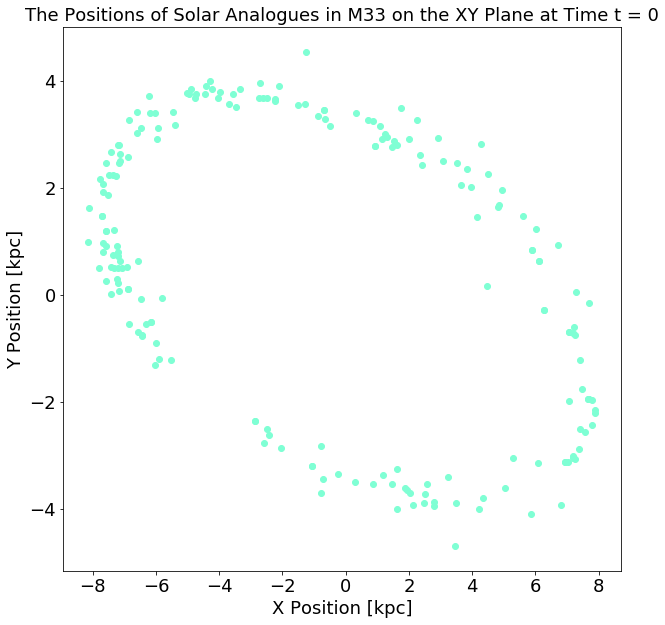

In [52]:
x,y,z = parpos("M33",0)

fig = plt.figure(figsize=(10,10))
plt.title('The Positions of Solar Analogues in M33 on the XY Plane at Time t = 0',fontsize=18)
plt.ylabel('Y Position [kpc]',fontsize=18)
plt.xlabel('X Position [kpc]',fontsize=18)

label_size = 18
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.scatter(x,y,color='aquamarine')

plt.show()

In [57]:
x,y,z = parpos("M33",200)

fig = plt.figure(figsize=(10,10))
plt.title('The Positions of Solar Analogues in M33 on the XY Plane at Time t = 0')
plt.ylabel('Y Position [kpc]')
plt.xlabel('X Position [kpc]')

plt.scatter(x,y,color='aquamarine')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'M33_200.txt'

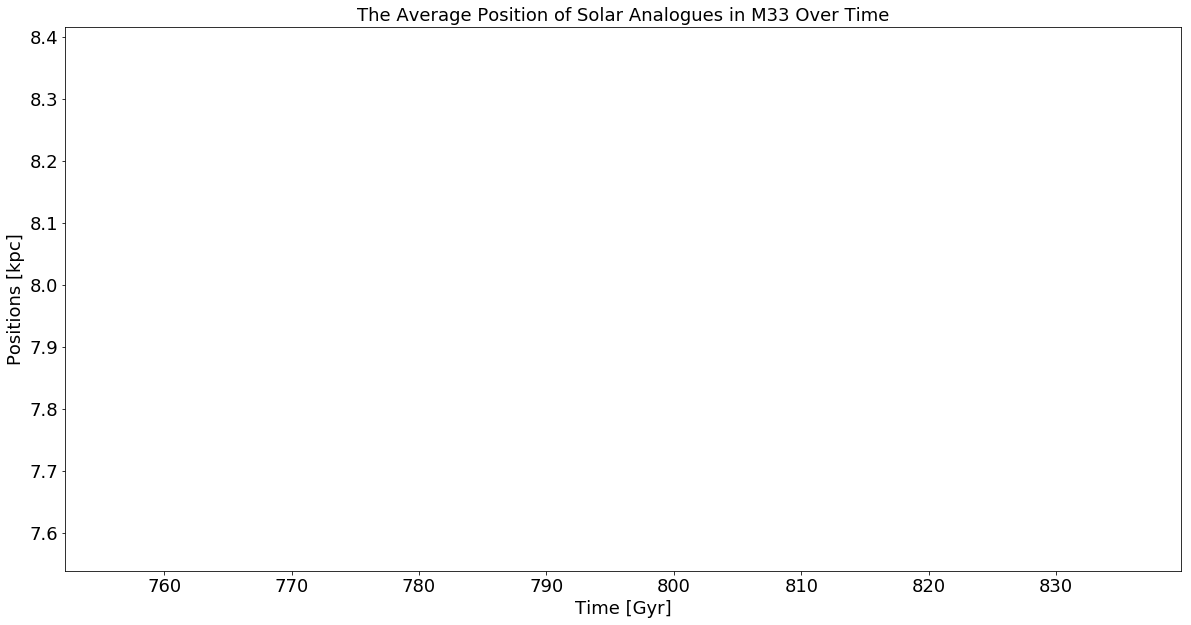

In [58]:
#determining the average position over time of the solar analogues and plotting them
#determining the position of each particle over time
M33anx,M33any,M33anz = parpos("M33",0)
snap_ids = np.arange(1,801,5)
orbit = np.zeros([len(snap_ids),7])
r = np.zeros(200)
for i,snap_ids in enumerate(snap_ids):
    #now we need to get the center of mass so that we can pick particles 8kpc away from the center of mass
    r = np.sqrt(M33anx**2+M33any**2+M33anz**2)
    ravg = np.sum(r)/200
    time = snap_ids

fig=plt.figure(figsize=(20,10))
plt.title('The Average Position of Solar Analogues in M33 Over Time',fontsize=18)
plt.ylabel('Positions [kpc]',fontsize=18)
plt.xlabel('Time [Gyr]',fontsize=18)
label_size = 18
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.plot(time,ravg,color='springgreen',linestyle='-.')

plt.show()